In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
from n2lite import n2lite

%matplotlib inline
import matplotlib.pyplot
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

In [2]:
beam = ['2l','2r','3l','3r','4l','4r','5l','5r']

fn_hot_pm2 = '20181114_134205'
fn_hot_pm3 = '20181114_141123'
fn_hot_pm4 = '20181114_144822'
fn_hot_pm5 = '20181114_151245'

path_hot_pm2 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm2 + '/param.db'
path_hot_pm3 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm3 + '/param.db'
path_hot_pm4 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm4 + '/param.db'
path_hot_pm5 = '/home/amigos/data/sql/hot_monitor/' + fn_hot_pm5 + '/param.db'

In [3]:
_hot_pm2 = n2lite.N2lite(path_hot_pm2)
hot_pm2 = _hot_pm2.read_pandas_all()
_hot_pm3 = n2lite.N2lite(path_hot_pm3)
hot_pm3 = _hot_pm3.read_pandas_all()
_hot_pm4 = n2lite.N2lite(path_hot_pm4)
hot_pm4 = _hot_pm4.read_pandas_all()
_hot_pm5 = n2lite.N2lite(path_hot_pm5)
hot_pm5 = _hot_pm5.read_pandas_all()

In [4]:
ut2 = hot_pm2['time']
pass_time2 = (ut2 - ut2[0]) / 60
ut3 = hot_pm3['time']
pass_time3 = (ut3 - ut3[0]) / 60
ut4 = hot_pm4['time']
pass_time4 = (ut4 - ut4[0]) / 60
ut5 = hot_pm5['time']
pass_time5 = (ut5 - ut5[0]) / 60

time = [pass_time2,pass_time2,pass_time3,pass_time3,pass_time4,pass_time4,pass_time5,pass_time5]
power = [hot_pm2['power_1'], hot_pm2['power_2'],hot_pm3['power_1'],hot_pm3['power_2'],hot_pm4['power_1'],hot_pm4['power_2'],hot_pm5['power_1'],hot_pm5['power_2']]

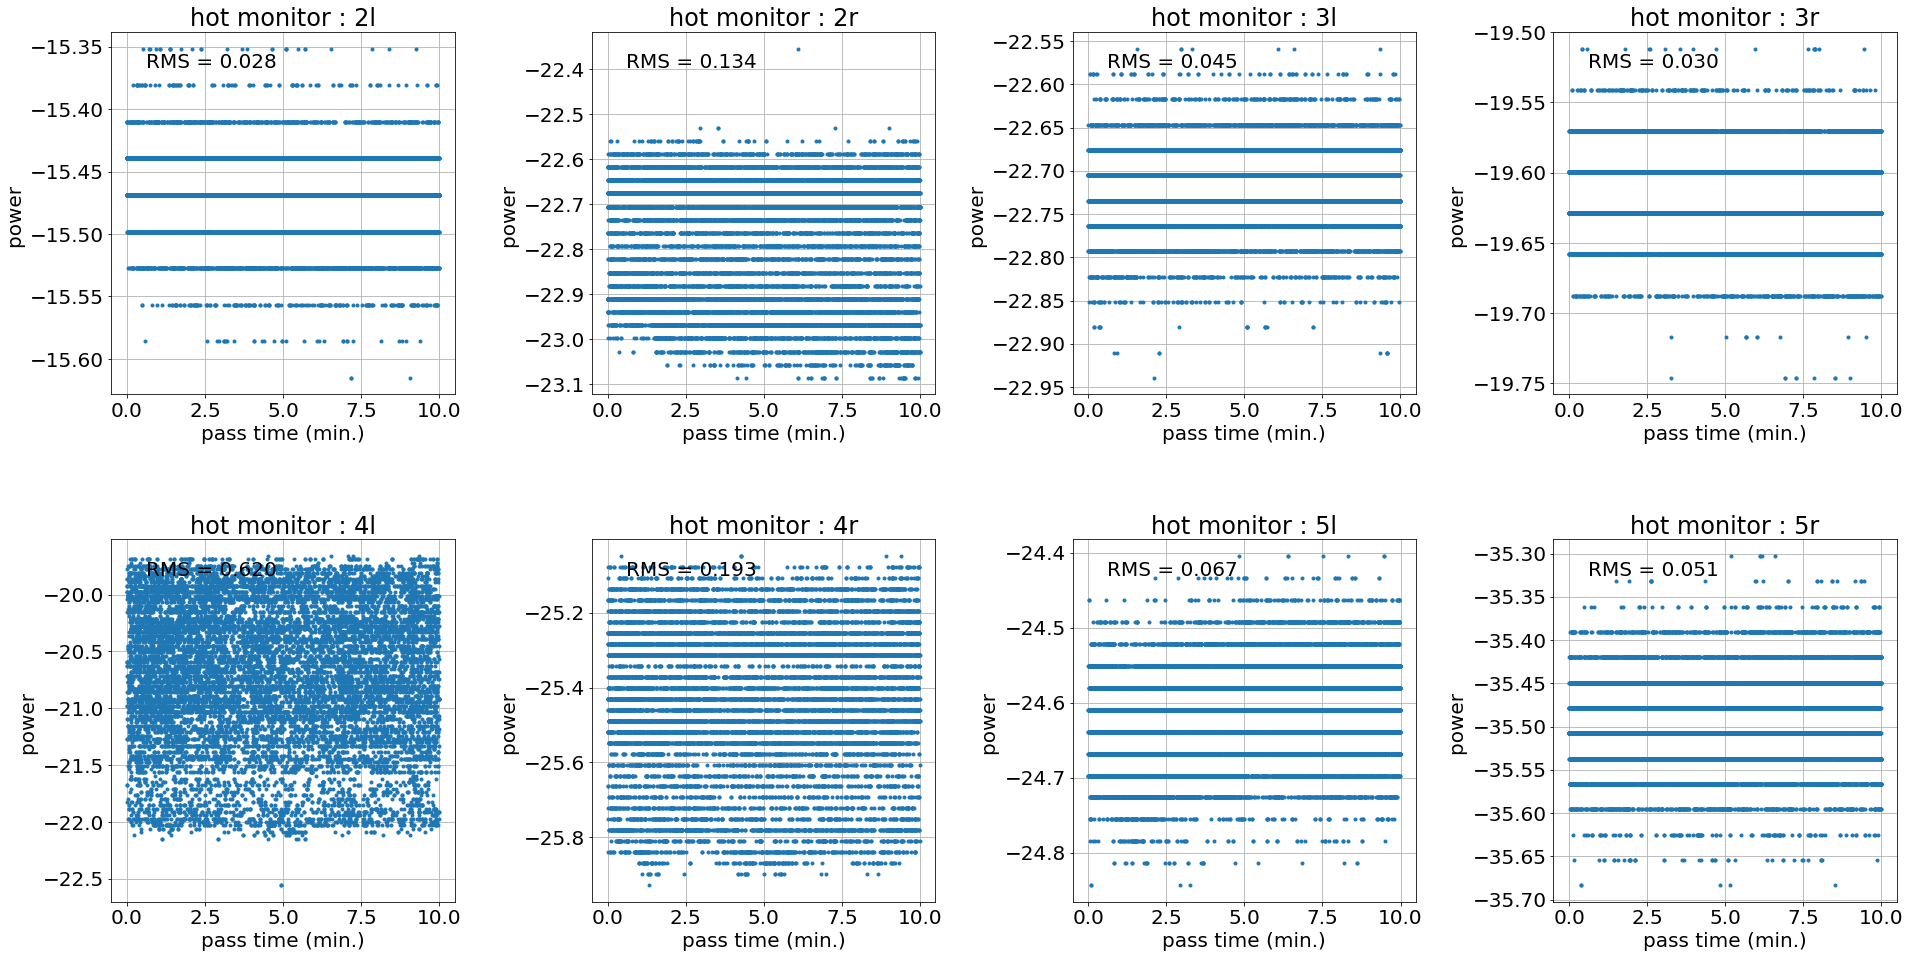

In [9]:
ncol = 4
nrow = 2
nax = ncol * nrow

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax, _power, _beam, _time in zip(ax, power, beam, time):
    _ax.plot(_time, _power, '.')
    _ax.grid()
    _ax.set_xlabel('pass time (min.)')
    _ax.set_ylabel('power ')
    #_ax.set_ylim(min(_power) - 0.1, max(_power) + 0.15)
    _ax.set_title('hot monitor : {}'.format(_beam))
    _ax.text(0.1, 0.90, 'RMS = {0:.3f} '.format(numpy.std(_power)), transform=_ax.transAxes)


fig.subplots_adjust(wspace=0.4, hspace=0.4)

#     matplotlib.pyplot.savefig('./fig/{}.png'.format(path))

matplotlib.pyplot.show()